In [1]:
import pandas as pd
import os

## Read cachegrind traces

In [2]:
FNAME = 'redis_memtier_cache'
f = open(os.path.join('../../traces',FNAME))

In [3]:
df = pd.DataFrame(columns=['fl','fn','line','Ir','I1mr','ILmr','Dr','D1mr','DLmr','Dw','D1mw','DLmw'])

In [4]:
curr_fl = ''
curr_fn  = ''
lines = f.readlines()
for line in lines[5:-1]:
    if('fl' in line):
        curr_fl = line.split('=')[1]
        continue
    elif('fn' in line):
        curr_fn = line.split('=')[1]
        continue
    else:
        row = [curr_fl,curr_fn]+list(map(int,line.split(' ')))
        df.append(row,ignore_index=True)
        df.loc[len(df)] = row

In [5]:
df

fl                 fn  \
0     /build/glibc-S9d2JN/glibc-2.27/csu/../csu/init...            _init\n   
1     /build/glibc-S9d2JN/glibc-2.27/csu/../csu/init...            _init\n   
2     /build/glibc-S9d2JN/glibc-2.27/csu/../csu/init...            _init\n   
3     /build/glibc-S9d2JN/glibc-2.27/csu/../csu/init...            _init\n   
4     /build/glibc-S9d2JN/glibc-2.27/csu/../csu/init...            _init\n   
...                                                 ...                ...   
3614  /usr/lib/gcc/x86_64-linux-gnu/7/include/smmint...   __strspn_sse42\n   
3615  /usr/lib/gcc/x86_64-linux-gnu/7/include/tmmint...  __strcspn_sse42\n   
3616  /usr/lib/gcc/x86_64-linux-gnu/7/include/tmmint...  __strpbrk_sse42\n   
3617  /usr/lib/gcc/x86_64-linux-gnu/7/include/tmmint...   __strspn_sse42\n   
3618                                              ???\n              ???\n   

     line     Ir I1mr ILmr    Dr D1mr DLmr    Dw D1mw DLmw  
0      52      8    1    1     0    0    0     4    0    0  
1      55      4    1    1     1    1    0     1    1    0  
2      62      5    1    1     4    2    0     0    0    0  
3      67      1    0    0     0    0    0     1    1    1  
4      68      1    0    0     0    0    0     1    0    0  
...   ...    ...  ...  ...   ...  ...  ...   ...  ...  ...  
3614  633      3    1    1     0    0    0     0    0    0  
3615  138     29    0    0    11    0    0     0    0    0  
3616  138     48    0    0    18    0    0     0    0    0  
3617  138      5    0    0     2    0    0     0    0    0  
3618    0  21221  388  359  5081  128   42  2709   23   20  

[3619 rows x 12 columns]

In [6]:
df_agg = df.groupby(['fl','fn']).agg('sum')

In [7]:
df_agg

line  \
fl                                                 fn                         
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/init-... _init\n              627   
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/libc-... (below main)\n      3924   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/g... _init\n              309   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/u... _init\n              332   
/build/glibc-S9d2JN/glibc-2.27/csu/errno-loc.c\n   __errno_location\n    53   
...                                                                     ...   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n     633   
/usr/lib/gcc/x86_64-linux-gnu/7/include/tmmintr... __strcspn_sse42\n    138   
                                                   __strpbrk_sse42\n    138   
                                                   __strspn_sse42\n     138   
???\n                                              ???\n                  0   

                                                                          Ir  \
fl                                                 fn                          
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/init-... _init\n                32   
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/libc-... (below main)\n         53   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/g... _init\n                44   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/u... _init\n                23   
/build/glibc-S9d2JN/glibc-2.27/csu/errno-loc.c\n   __errno_location\n      6   
...                                                                      ...   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n        3   
/usr/lib/gcc/x86_64-linux-gnu/7/include/tmmintr... __strcspn_sse42\n      29   
                                                   __strpbrk_sse42\n      48   
                                                   __strspn_sse42\n        5   
???\n                                              ???\n               21221   

                                                                       I1mr  \
fl                                                 fn                         
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/init-... _init\n                3   
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/libc-... (below main)\n         4   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/g... _init\n                2   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/u... _init\n                1   
/build/glibc-S9d2JN/glibc-2.27/csu/errno-loc.c\n   __errno_location\n     1   
...                                                                     ...   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n       1   
/usr/lib/gcc/x86_64-linux-gnu/7/include/tmmintr... __strcspn_sse42\n      0   
                                                   __strpbrk_sse42\n      0   
                                                   __strspn_sse42\n       0   
???\n                                              ???\n                388   

                                                                       ILmr  \
fl                                                 fn                         
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/init-... _init\n                3   
/build/glibc-S9d2JN/glibc-2.27/csu/../csu/libc-... (below main)\n         4   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/g... _init\n                2   
/build/glibc-S9d2JN/glibc-2.27/csu/../sysdeps/u... _init\n                1   
/build/glibc-S9d2JN/glibc-2.27/csu/errno-loc.c\n   __errno_location\n     1   
...                                                                     ...   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n       1   
/usr/lib/gcc/x86_64-linux-gnu/7/include/tmmintr... __strcspn_sse42\n      0   
                                                   __strpbrk_sse42\n      0   
                                                   __strspn_sse42\n       0   
???\n                     

In [8]:
df_agg['Rmp'] = (df_agg['DLmr']+df_agg['ILmr'])/(df_agg['Ir']+df_agg['Dr'])*100

In [9]:
df_agg['Wmp'] = (df_agg['DLmw'])/(df_agg['Dw'])*100

In [10]:
df_agg['mp'] = (df_agg['DLmr']+df_agg['ILmr']+df_agg['DLmw'])/(df_agg['Ir']+df_agg['Dr']+df_agg['Dw'])*100

In [11]:
df_agg['m'] = (df_agg['DLmr']+df_agg['ILmr']+df_agg['DLmw'])

In [12]:
df_agg['h'] = df_agg['m']*(100/df_agg['mp'])-df_agg['m']

In [13]:
df_agg.sort_values(by='m',ascending=False)

line  \
fl                                                 fn                              
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/x... _dl_relocate_object\n   15759   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-addr.c\n     _dl_addr\n               2600   
???\n                                              ???\n                       0   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-lookup.c\n   do_lookup_x\n           19646   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcmp\n               599949   
...                                                                          ...   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... rawmemchr\n                31   
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/g... _dl_relocate_object\n     102   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... memrchr\n                  29   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... bcmp\n                     29   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strchrnul\n                62   

                                                                             Ir  \
fl                                                 fn                             
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/x... _dl_relocate_object\n  25531   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-addr.c\n     _dl_addr\n             59300   
???\n                                              ???\n                  21221   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-lookup.c\n   do_lookup_x\n          50529   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcmp\n               24353   
...                                                                         ...   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... rawmemchr\n                1   
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/g... _dl_relocate_object\n    528   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... memrchr\n                  1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... bcmp\n                     1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strchrnul\n               14   

                                                                          I1mr  \
fl                                                 fn                            
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/x... _dl_relocate_object\n    29   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-addr.c\n     _dl_addr\n                8   
???\n                                              ???\n                   388   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-lookup.c\n   do_lookup_x\n            22   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcmp\n                 58   
...                                                                        ...   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... rawmemchr\n               0   
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/g... _dl_relocate_object\n     0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... memrchr\n                 0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... bcmp\n                    0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strchrnul\n               0   

                                                                          ILmr  \
fl                                                 fn                            
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/x... _dl_relocate_object\n    29   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-addr.c\n     _dl_addr\n                8   
???\n                                              ???\n                   359   
/build/glibc-S9d2JN/glibc-2.27/elf/dl-lookup.c\n   do_lookup_x\n            22   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcmp\n                 57   
...                                                                        ...   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... rawmemchr\n               0   
/build/glibc-S9d2JN/glibc-2.27/elf/../sysdeps/g... _dl_relocate_object\n     0   
/build/glibc-S9d

In [14]:
df_agg.sort_values(by='mp',ascending=False)

line  \
fl                                                 fn                         
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n         31   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp_l\n       31   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n     633   
/build/glibc-S9d2JN/glibc-2.27/elf/../elf/dl-tl... _dl_count_modids\n   227   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcasecmp\n          31   
...                                                                     ...   
/build/glibc-S9d2JN/glibc-2.27/elf/setup-vdso.h\n  dl_main\n             24   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n         32   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncpy\n             29   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strnlen\n             31   
/build/glibc-S9d2JN/glibc-2.27/misc/../sysdeps/... mprotect\n           157   

                                                                       Ir  \
fl                                                 fn                       
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n        1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp_l\n      1   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n     3   
/build/glibc-S9d2JN/glibc-2.27/elf/../elf/dl-tl... _dl_count_modids\n   4   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcasecmp\n         2   
...                                                                    ..   
/build/glibc-S9d2JN/glibc-2.27/elf/setup-vdso.h\n  dl_main\n            2   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n        5   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncpy\n            1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strnlen\n            2   
/build/glibc-S9d2JN/glibc-2.27/misc/../sysdeps/... mprotect\n          30   

                                                                       I1mr  \
fl                                                 fn                         
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n          1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp_l\n        1   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n       1   
/build/glibc-S9d2JN/glibc-2.27/elf/../elf/dl-tl... _dl_count_modids\n     1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcasecmp\n           1   
...                                                                     ...   
/build/glibc-S9d2JN/glibc-2.27/elf/setup-vdso.h\n  dl_main\n              0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n          0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncpy\n              0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strnlen\n              0   
/build/glibc-S9d2JN/glibc-2.27/misc/../sysdeps/... mprotect\n             0   

                                                                       ILmr  \
fl                                                 fn                         
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n          1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp_l\n        1   
/usr/lib/gcc/x86_64-linux-gnu/7/include/smmintr... __strspn_sse42\n       1   
/build/glibc-S9d2JN/glibc-2.27/elf/../elf/dl-tl... _dl_count_modids\n     1   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strcasecmp\n           1   
...                                                                     ...   
/build/glibc-S9d2JN/glibc-2.27/elf/setup-vdso.h\n  dl_main\n              0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncasecmp\n          0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strncpy\n              0   
/build/glibc-S9d2JN/glibc-2.27/string/../sysdep... strnlen\n              0   
/build/glibc-S9d2JN/glibc-2.27/misc/../sysdeps/... mprotect\n    

In [15]:
(df_agg['DLmr'].sum()+df_agg['ILmr'].sum()+df_agg['DLmw'].sum())/(df_agg['Ir'].sum()+df_agg['Dr'].sum()+df_agg['Dw'].sum())*100

1.2081253301993595

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'CDF')

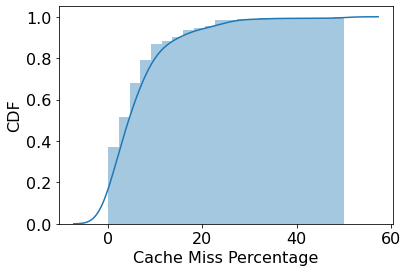

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 16})


x = df_agg['mp']
kwargs = {'cumulative': True}
fig = plt.figure()
ax = plt.subplot()

sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs,ax=ax)

ax.set_xlabel('Cache Miss Percentage')
ax.set_ylabel('CDF')


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'CDF')

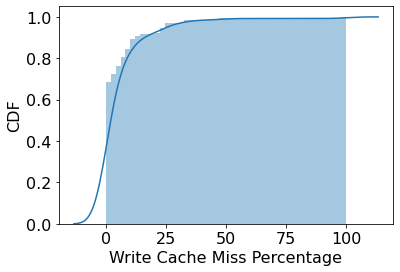

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 16})


x = df_agg['Wmp']
kwargs = {'cumulative': True}
fig = plt.figure()
ax = plt.subplot()

sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs,ax=ax)

ax.set_xlabel('Write Cache Miss Percentage')
ax.set_ylabel('CDF')


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'CDF')

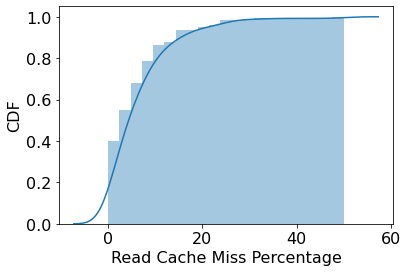

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 16})


x = df_agg['Rmp']
kwargs = {'cumulative': True}
fig = plt.figure()
ax = plt.subplot()

sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs,ax=ax)

ax.set_xlabel('Read Cache Miss Percentage')
ax.set_ylabel('CDF')
